# WeatherPy
----

### Analysis
* Since it is summer season for the southern hemisphere, the lat vs max temperature shows the higher temp area is between 20 to -40 degrees (more towards the souther part). Majority cities in southern hemispher is above 60 degrees.  This should be caused by the distance between the Sun and the Earth (not studied in this project).
* Humidity has no strong pattern. Souther hemispher humidity is slightly higher. Locations close to equator is higher as well.
* There is no strong pattern between latitude and cloudiness. See more cities have nearly 0 cloudiness in the equator area.
* Most cities on earth have wind speed below 20 mph. See more cities have strong wind in the northern hemispher, the higher the altitude, the stronger the wind speed.

---

#### Note
* Instructions have been included for each segment. 

In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import openweathermapy.core as owm
from pprint import pprint


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from datetime import datetime
# Output File (CSV)
output_data_file = "..\output_data\cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [114]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [115]:
#Remove duplicate cities
cities_df = pd.DataFrame(cities)
cities_df.columns = ['City']
cities_df.count()
cities_df.head()

,City
0,rikitea
1,antalaha
2,rodbyhavn
3,ushuaia
4,kapit


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [116]:
# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

lat=[]
lon=[]
max_temp=[]
humidity=[]
clouds=[]
wind=[]
country=[]
date=[]
city_name=[]


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


print("Beginning Data Retrieval     ")
print("-----------------------------")

#row_count = 1
#set_count = 1

weather_cities=[]

for city in cities:
    
    try:
        response=requests.get(query_url+city).json()
        print(query_url+city)
        
    
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])  
        date.append(response["dt"])
    except:
        print("City not found. Skipping...")
        
    continue   
    
        

#print("Proceesing Record " , row_count, ' of Set ',set_count,' | ' , city_data["name"])



    

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")





Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=rikitea
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=antalaha
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=rodbyhavn
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=kapit
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=bhola
http://api.openweathermap.org/data/2.5/weath

http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=yulara
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=bluff
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=haines junction
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=hambantota
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=umzimvubu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=tilichiki
http://api.openweathermap.org/data/2.5/weather?appid=136

http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=kailua
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=horasan
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=taltal
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=voznesenye
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=ko samui
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=souillac
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=bereda
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=brae
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=starobalta

http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=vangaindrano
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=te anau
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=manggar
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=burnie
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=lillooet
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=sorland
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=mubi
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q

http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=warren
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=juneau
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=inongo
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=luderitz
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=bonthe
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=middelburg
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=salin

http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=sola
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=wanaka
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=airai
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=clonakilty
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=nabire
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=mikuni
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=praya
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=chapais
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=baykit
http://ap

http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=susangerd
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=shu
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=sataua
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=necochea
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=samarinda
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=bambanglipuro
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=mao
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=brezovica pri ljubljani
http://api.openweathermap.org/data/2.5/weather?appid=136324051303d

http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=tawkar
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=morehead
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=iquique
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=rio verde de mato grosso
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=nome
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=azimur
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=general pico
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=magdeburg
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=thabazimbi
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=kuva
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=bolobo
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=kamp-lintfort
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=wulanhaote
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=sofiysk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=wahran
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=136324051303dc7f281179221cceed0c&units=imperial&q=f

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [117]:
weather_dict={
    "City":city_name,
    "Cloudiness":clouds,
    "Country":country,            
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lon,
    "Max Temp":max_temp,
    "Wind Speed":wind,
}

weather_data=pd.DataFrame(weather_dict)
weather_data.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [118]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,12,PF,1547153894,98,-23.12,-134.97,80.07,13.65
1,Antalaha,76,MG,1547154397,93,-14.90,50.28,78.27,2.91
2,Rodbyhavn,92,DK,1547154397,100,54.65,11.35,36.15,14.76
3,Ushuaia,40,AR,1547150400,54,-54.81,-68.31,59.00,11.41
4,Kapit,88,MY,1547154397,97,2.02,112.94,73.77,1.79


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

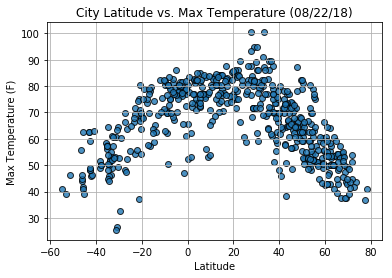

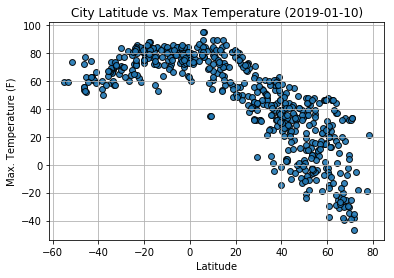

In [139]:
#Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=35, alpha=0.9,
    edgecolor="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({datetime.now().date()})')
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("\images\CityLatVsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

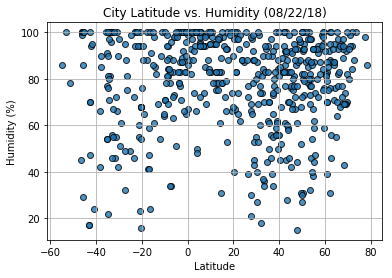

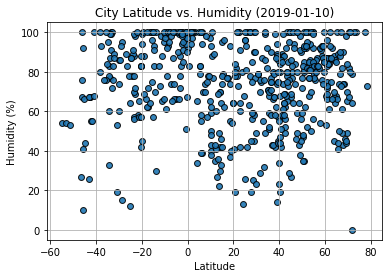

In [137]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=35, alpha=0.9,
    edgecolor="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({datetime.now().date()})')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("\images\CityLatVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

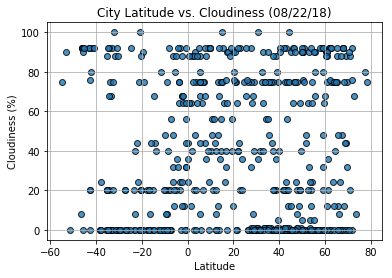

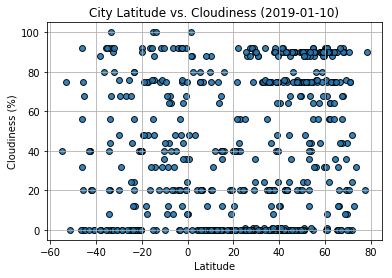

In [136]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=35, alpha=0.9,
    edgecolor="black")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({datetime.now().date()})')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("\images\CityLatVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

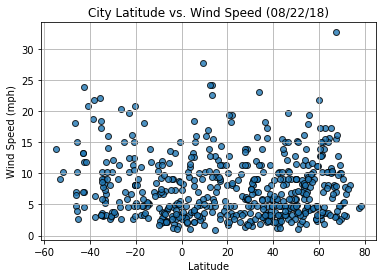

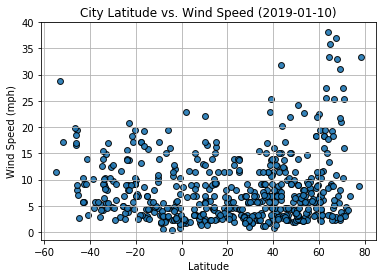

In [127]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=35, alpha=0.9,
    edgecolor="black")

# Incorporate the other graph properties
#plt.title("City Latitude vs. Wind Speed")
plt.title(f'City Latitude vs. Wind Speed ({datetime.now().date()})')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("\images\CityLatVsWindSpeed.png")

# Show plot
plt.show()